<a href="https://colab.research.google.com/github/rururuwww/Garbage-detection/blob/master/Garbage_Segregation_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Viewing classes in Directory**





In [1]:
!git clone https://github.com/srijarkoroy/Garbage_Segregation.git

Cloning into 'Garbage_Segregation'...
remote: Enumerating objects: 2607, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 2607 (delta 27), reused 7 (delta 3), pack-reused 2555
Receiving objects: 100% (2607/2607), 71.68 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/Garbage_Segregation/Data"

classes = os.listdir(dir_example)
print(classes)

['README.md', 'Test', 'Train']


In [3]:
dir_example = "/content/Garbage_Segregation/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['glass', 'trash', 'metal', 'paper', 'plastic', 'cardboard']


# **Visualizing Images in Dataset from each class**

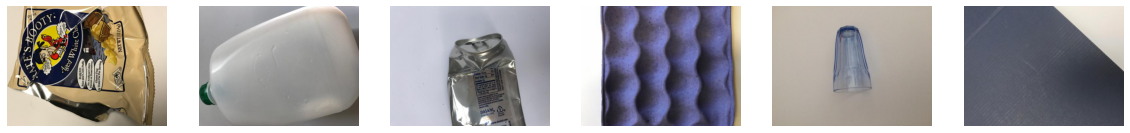

In [4]:
dir_with_examples = '/content/Garbage_Segregation/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [5]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Configuration**

In [6]:
train = '/content/Garbage_Segregation/Data/Train'
test = '/content/Garbage_Segregation/Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [7]:

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 3239 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 553 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [9]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 300, 300, 3), (32,))

In [10]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [11]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Model Architecture**

In [12]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

# **Model Compilation**

In [14]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [15]:
model.fit_generator(train_generator,
          epochs=15,
          steps_per_epoch=2184//32)

<ipython-input-15-2ec389ecac5a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/15
68/68 [==============================] - 24s 172ms/step - loss: 1.6799 - accuracy: 0.3013
Epoch 2/15
68/68 [==============================] - 12s 171ms/step - loss: 1.4338 - accuracy: 0.4068
Epoch 3/15
68/68 [==============================] - 12s 170ms/step - loss: 1.3114 - accuracy: 0.4766
Epoch 4/15
68/68 [==============================] - 11s 167ms/step - loss: 1.2180 - accuracy: 0.5146
Epoch 5/15
68/68 [==============================] - 11s 168ms/step - loss: 1.1556 - accuracy: 0.5472
Epoch 6/15
68/68 [==============================] - 11s 165ms/step - loss: 1.0324 - accuracy: 0.5993
Epoch 7/15
68/68 [==============================] - 12s 169ms/step - loss: 0.9364 - accuracy: 0.6430
Epoch 8/15
68/68 [==============================] - 11s 168ms/step - loss: 0.8510 - accuracy: 0.6792
Epoch 9/15
68/68 [==============================] - 11s 168ms/step - loss: 0.7809 - accuracy: 0.7150
Epoch 10/15
68/68 [==============================] - 11s 167ms/step - loss: 0.6911 - accura

# **Testing Predictions**

1/1 [==============================] - 0s 301ms/step
Probability: 0.93726194
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

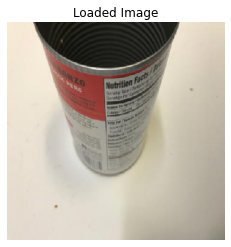

In [17]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
test_img = '/content/Garbage_Segregation/Data/Test/metal/metal362.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [18]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.09 %
GLASS : 4.13 %
METAL : 93.73 %
PAPER : 0.78 %
PLASTIC : 1.24 %
TRASH : 0.02 %


1/1 [==============================] - 0s 43ms/step
Probability: 0.6233342
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

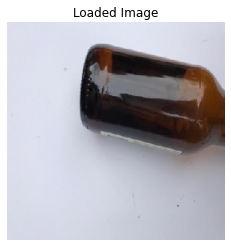

In [ ]:
test_img = 'Data/Test/glass/glass421.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 2.61 %
GLASS : 62.33 %
METAL : 17.81 %
PAPER : 0.73 %
PLASTIC : 15.99 %
TRASH : 0.53 %


1/1 [==============================] - 0s 50ms/step
Probability: 0.9019071
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

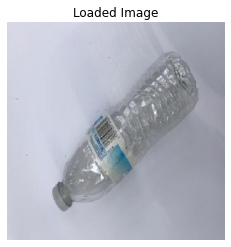

In [ ]:
test_img = 'Data/Test/plastic/plastic425.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.73 %
GLASS : 3.26 %
METAL : 4.2 %
PAPER : 1.41 %
PLASTIC : 90.19 %
TRASH : 0.21 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

## ***Saving model as 'model.h5'***

In [33]:
model.save('/content/Garbage_Segregation/weights/mm.h5')

In [26]:
from google.colab import files

In [36]:
files.download('/content/Garbage_Segregation/weights/mm.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:

!zip -r /content/Data.zip /content/Garbage_Segregation

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (/content/Data.zip)


In [45]:
files.download('/content/Data1.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>